In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [3]:
print("Seaborn version:", sns.__version__)
print("Pandas version:", pd.__version__)


Seaborn version: 0.12.2
Pandas version: 2.2.3


In [4]:
#导入数据，分析数据
data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv",header=0,sep=',')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


需要缺失值填充


In [5]:
#观察数据
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

通过我们的数据信息可以看出还是有很多缺失值的，而且我们也观察到特征向量十分的多，所以在我们在这里用岭回归或者lasso来写，而且dtypes: float64(3), int64(35), object(43)，object的种类还是很多的所以，我们还需要做一个热力图，所以这方面需要学习一下

In [6]:
data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


这里面的数据很多，我们不妨尝试将他们的hist刻画出来，这样比较直观，更加好下手

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
data=data.drop('Id',axis=1)#删除id这一行

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x300 with 0 Axes>

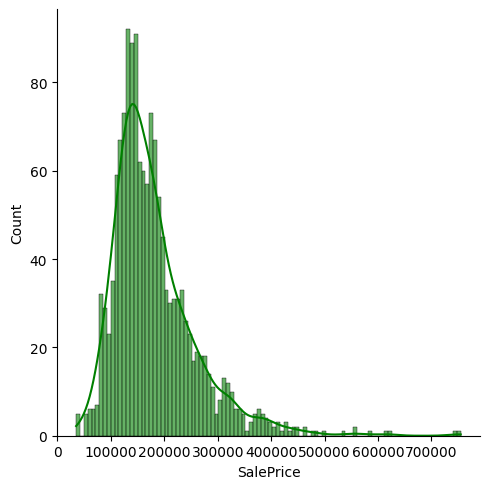

In [9]:
#这里我们对=将房价的数据调出来用sns来进行刻画

plt.figure(figsize=(12,3))
data_saleprice=data['SalePrice']
#plt.hist(data_saleprice)
#不难发现在100000到200000区间的房子是最多的
#进阶写法使用我们的更加强大的seaborn库
sns.displot(data_saleprice,color='g',bins=100,alpha=0.6,kde=True)


图片中的平滑曲线是通过 ​核密度估计（KDE）​ 生成的，其核心步骤为：

计算每个数据点的核函数贡献。
叠加所有核函数并归一化为概率密度曲线。
调整带宽参数以优化平滑度。
使用 Seaborn 的 kdeplot() 或 displot(kde=True) 可快速复现此效果。若需自定义曲线细节（如带宽、颜色），需通过参数显式控制。

In [10]:
#接下来就是用柱状图刻画所有数据类型是float或者是int类型的
#使用函数select_dtypes
df_num=data.select_dtypes(include=['int','float'])
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [11]:
#处理缺失值
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        # 数值列用均值填充缺失值
        mean_value = data[column].mean()
        data[column] = data[column].fillna(mean_value)
    else:
        # 分类列用众数填充缺失值
        mode_value = data[column].mode()[0]
        data[column] = data[column].fillna(mean_value)
data.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

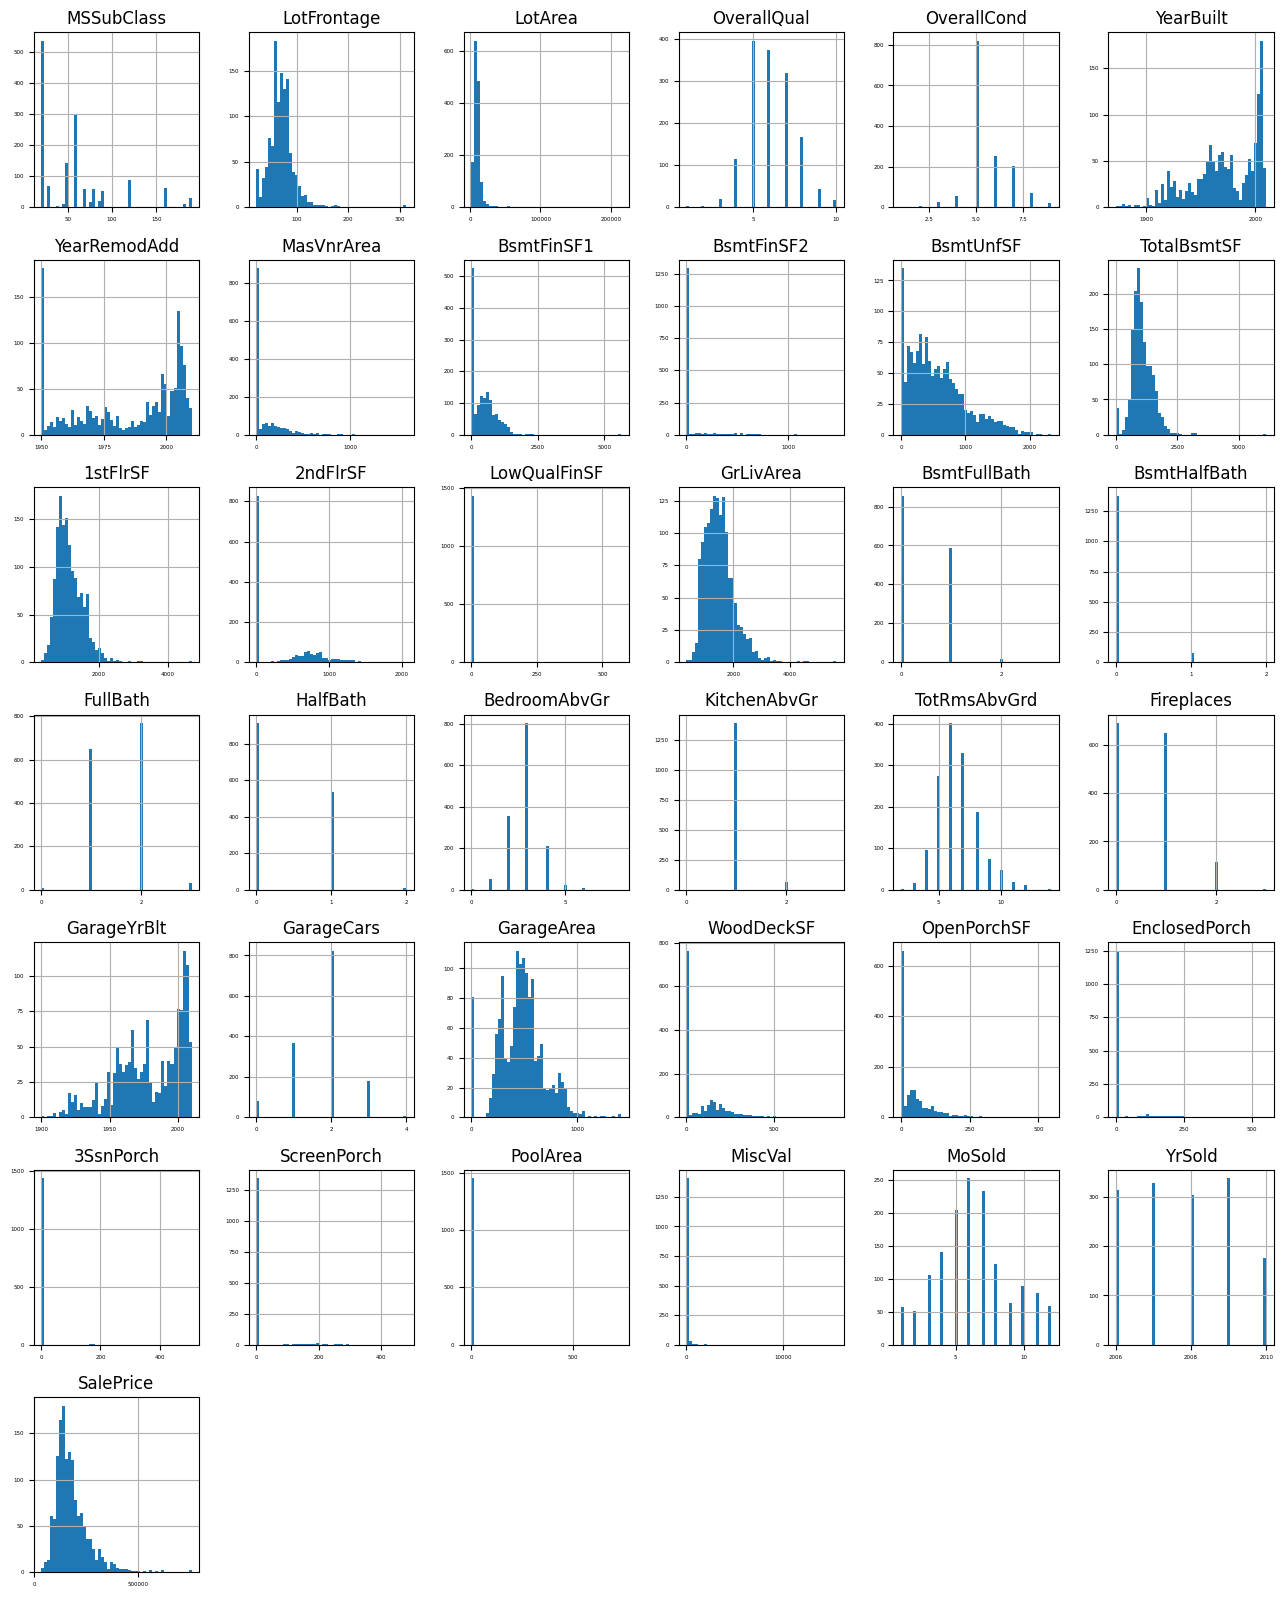

In [12]:
%matplotlib inline
df_num.hist(figsize=(16,20),bins=50,xlabelsize=4, ylabelsize=4)

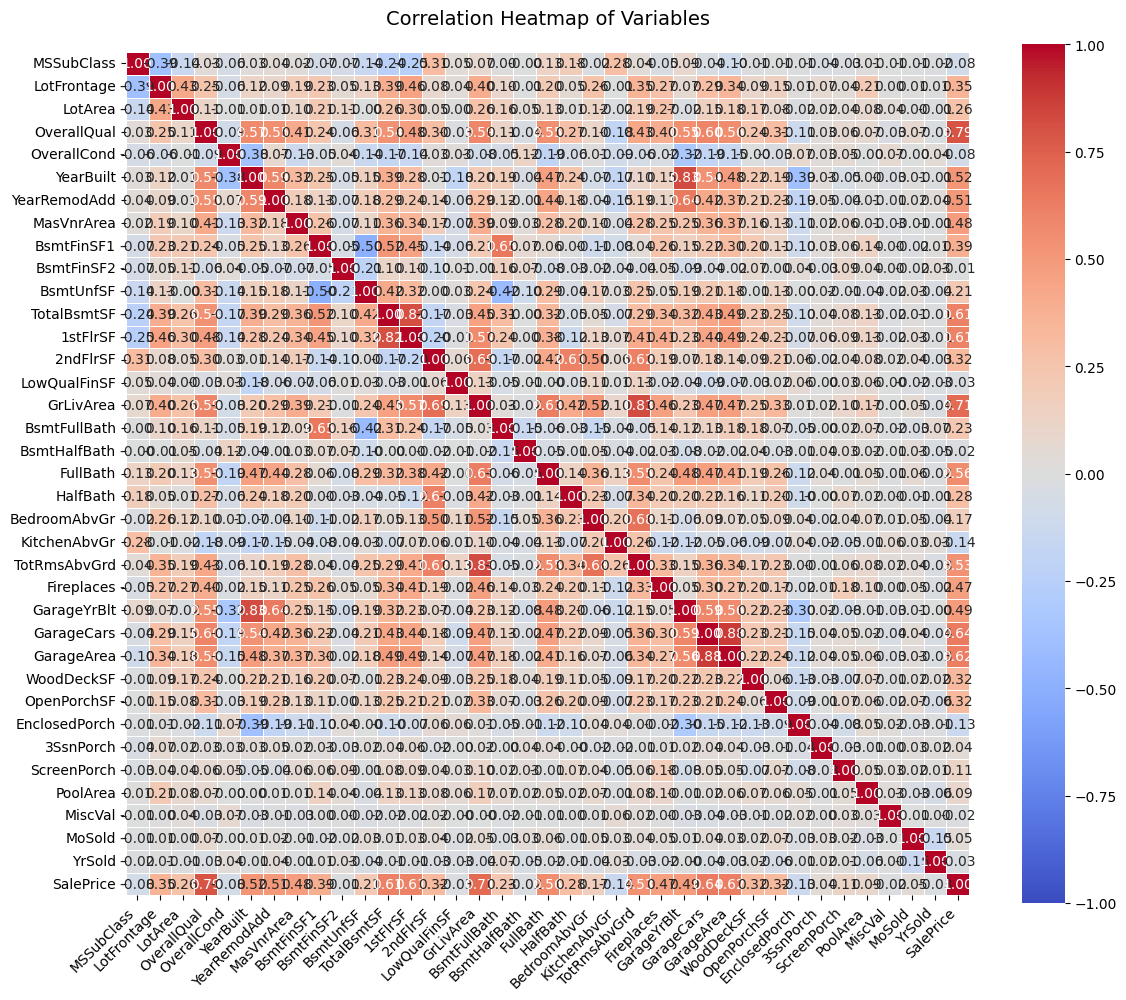

In [13]:
#绘制相关性热力图，观察特征向量之间的关系
plt.figure(figsize=(12,10))
corr_matrix=df_num.corr()
sns.heatmap(
     corr_matrix,
    annot=True,          # 显示数值（如你的图片中的0.90、-0.08等）
    fmt=".2f",           # 数值格式为两位小数（调整精度）
    cmap="coolwarm",     # 颜色映射：蓝-白-红（与你的图片一致）
    linewidths=0.5,      # 单元格边线宽度
    linecolor="white",   # 边线颜色（增强单元格分隔效果）
    cbar=True,           # 显示右侧颜色条
    square=True,         # 单元格为正方形（排版更整齐）
    vmin=-1, vmax=1      # 固定颜色范围[-1, 1]
)
plt.title("Correlation Heatmap of Variables", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')  # 旋转X轴标签（避免重叠）
plt.yticks(rotation=0)               # Y轴标签水平显示

# 5. 优化布局
plt.tight_layout()

In [14]:
#开始机器学习
X_train=data.drop(columns='SalePrice')
y_train=data['SalePrice']


In [15]:
test_data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv",header=0,sep=",")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
"""
# 数据预处理修正
import pandas as pd
import numpy as np

# 读取数据
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_id = test_data['Id']  # 保存测试集ID

# 分离目标变量
y_train_full = train_data['SalePrice']
train_data = train_data.drop('SalePrice', axis=1)

# 合并数据集（仅特征）
combined = pd.concat([train_data, test_data], ignore_index=True).drop('Id', axis=1)

# 分类型列处理
categorical_cols = combined.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col in train_data.columns:
        # 用训练集的众数填充
        mode_val = train_data[col].mode()[0]
        combined.loc[:, col] = combined[col].fillna(mode_val)
    else:
        # 新列用'missing'填充
        combined.loc[:, col] = combined[col].fillna('missing')

# 数值型列处理
numeric_cols = combined.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if col in train_data.columns:
        # 用训练集的均值填充
        mean_val = train_data[col].mean()
        combined.loc[:, col] = combined[col].fillna(mean_val)
    # 如果不在训练集中，此处不做处理（根据原代码逻辑）
    # 如需强制填充，可添加 else 逻辑（例如填充0）
    # else:
    #     combined.loc[:, col] = combined[col].fillna(0)
# 特征编码（保证维度一致性）
combined_encoded = pd.get_dummies(combined)

# 重新分离数据集
X_train = combined_encoded.iloc[:len(train_data)]
X_test = combined_encoded.iloc[len(train_data):]

# 数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 数据集划分（使用完整训练集）
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, 
    np.log(y_train_full),  # 对数变换
    test_size=0.2,
    random_state=42
)

# 构建优化后的弹性网络模型
def build_enhanced_elastic_net(alpha=0.05, l1_ratio=0.3):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', 
                            kernel_regularizer=tf.keras.regularizers.l1_l2(l1=alpha*l1_ratio, 
                                                                          l2=alpha*(1-l1_ratio))),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=tf.keras.regularizers.l1_l2(l1=alpha*l1_ratio,
                                                                          l2=alpha*(1-l1_ratio))),
        tf.keras.layers.Dense(1)
    ])
    return model

# 初始化模型
model = build_enhanced_elastic_net()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# 训练配置
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10
)

# 模型训练
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=300,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 模型评估
val_pred = model.predict(X_val_split).flatten()
mae_log_scale = mean_absolute_error(y_val_split, val_pred)  # 对数尺度MAE
mae_original = np.exp(mae_log_scale)  # 转换为原始房价尺度

# 测试集预测
test_pred = model.predict(X_test_scaled).flatten()
final_pred = np.exp(test_pred)  # 指数逆变换

# 生成提交文件
submission = pd.DataFrame({'Id': test_id, 'SalePrice': final_pred})
submission.to_csv('enhanced_submission.csv', index=False)

# 验证数据维度
print(f"训练集最终维度: {X_train_scaled.shape}")  # 应显示 (1460, n_features)
print(f"测试集最终维度: {X_test_scaled.shape}")    # 应显示 (1459, n_features)
"""

'\n# 数据预处理修正\nimport pandas as pd\nimport numpy as np\n\n# 读取数据\ntrain_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")\ntest_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")\ntest_id = test_data[\'Id\']  # 保存测试集ID\n\n# 分离目标变量\ny_train_full = train_data[\'SalePrice\']\ntrain_data = train_data.drop(\'SalePrice\', axis=1)\n\n# 合并数据集（仅特征）\ncombined = pd.concat([train_data, test_data], ignore_index=True).drop(\'Id\', axis=1)\n\n# 分类型列处理\ncategorical_cols = combined.select_dtypes(include=[\'object\']).columns\nfor col in categorical_cols:\n    if col in train_data.columns:\n        # 用训练集的众数填充\n        mode_val = train_data[col].mode()[0]\n        combined.loc[:, col] = combined[col].fillna(mode_val)\n    else:\n        # 新列用\'missing\'填充\n        combined.loc[:, col] = combined[col].fillna(\'missing\')\n\n# 数值型列处理\nnumeric_cols = combined.select_dtypes(include=[\'int64\', \'float64\']).columns\nfor col in nume

In [17]:
import numpy as np
import pandas as pd
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_id=test_data['Id']
#分离特征向量
y_train_full = train_data['SalePrice']
train_data = train_data.drop('SalePrice', axis=1)
#合并特征数据
combined=pd.concat([train_data,test_data],ignore_index=True).drop('Id',axis=1)

#分类型列处理
#找到合并以后的所有的分类型列
categorical_cols=combined.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col in train_data.columns:
        model_val=train_data[col].mode()[0]
        combined.loc[:, col] = combined[col].fillna(model_val)
        '''
        ​train_data[col]
功能：从DataFrame train_data 中选取名为 col 的列。
作用：定位到需要处理的特定数据列（例如："Age", "Gender" 等）。
​**.mode()**
功能：计算该列的众数（mode）。
作用：返回一个包含众数值的Pandas Series对象。
如果列中有多个值出现次数相同且最多（例如：[1,1,2,2]），则返回所有众数。
如果所有值唯一（例如：[1,2,3,4]），则返回空Series（需注意异常处理）。
适用场景：常用于分类数据或离散型数值数据（如性别、学历等）。
​**[0]**
功能：从众数列表中选择第一个值。
作用：当存在多个众数时，取第一个作为代表值（例如：众数列表为 [2,3] 时取2）。

        '''
    else:
        combined.loc[:,col]=combined[col].fillna('missing')
numeric_cols=combined.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    if col in train_data.columns:
        mean_val=train_data[col].mean()
        combined.loc[:,col]=combined[col].fillna(mean_val)
combined_encoded = pd.get_dummies(combined)
'''
​**pd.get_dummies()**

​功能：Pandas库中用于将分类型数据转换为虚拟变量的核心函数。
​核心操作：
自动识别数据中的 ​分类型列​（默认处理 object 或 category 类型）。
为每个分类值生成一个独立的二进制列（0/1）。
数值型列保持不变。
​输出：返回一个新的DataFrame，原始分类型列被替换为多个二进制列。
'''
X_train=combined_encoded.iloc[:len(train_data)]
X_test=combined_encoded.iloc[len(train_data):]


In [18]:
#数据标准化
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)


In [19]:
# 数据集划分（使用完整训练集）
from sklearn.model_selection import train_test_split

X_train_split,X_val_split,y_train_split,y_val_split=train_test_split(
    X_train_scaled,
    np.log(y_train_full),
    test_size=0.2,
    random_state=42
)
'''
2. np.log(y_train_full)
​含义：对目标变量（房价）进行对数变换
作用：
解决目标变量的右偏分布​（例如房价通常存在少数极高值）。
使模型更关注相对误差​（而非绝对误差），提升预测稳定性。
​恢复预测结果时需要反向操作：np.exp(predictions)
4. random_state=42
​含义：随机数种子，保证每次拆分结果一致。
​作用：
确保实验可复现性（其他人运行相同代码得到相同拆分结果）。
调试模型时避免数据划分的随机性干扰结果分析。
常用值：42（机器学习社区惯例）、0、1 等任意整数。

'''


'\n2. np.log(y_train_full)\n\u200b含义：对目标变量（房价）进行对数变换\n作用：\n解决目标变量的右偏分布\u200b（例如房价通常存在少数极高值）。\n使模型更关注相对误差\u200b（而非绝对误差），提升预测稳定性。\n\u200b恢复预测结果时需要反向操作：np.exp(predictions)\n4. random_state=42\n\u200b含义：随机数种子，保证每次拆分结果一致。\n\u200b作用：\n确保实验可复现性（其他人运行相同代码得到相同拆分结果）。\n调试模型时避免数据划分的随机性干扰结果分析。\n常用值：42（机器学习社区惯例）、0、1 等任意整数。\n\n'

In [20]:
def build_enhanced_elastic_net(alpha=0.05,l1_ratio=0.3):
    model=tf.keras.Sequential([
        tf.keras.layers.Dense(128,activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l1_l2(l1=alpha*l1_ratio,
                                                        l2=alpha*(1-l1_ratio))),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64,activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l1_l2(l1=alpha*l1_ratio,
                                                                      l2=alpha*(1-l1_ratio))),
        tf.keras.layers.Dense(1)

        
    ])
    return model


In [21]:
#初始化模型
model=build_enhanced_elastic_net()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),#Adam作用自主调节学习率
    loss='mse',
    metrics=['mae']
)


In [22]:
#设置早停机制的作用
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True
)


早停机制（Early Stopping）是机器学习中用于防止模型过拟合、优化训练效率的一种策略。其核心作用包括：

1. 防止过拟合
在训练过程中，模型可能在训练集上表现持续提升，但在验证集上的性能达到峰值后开始下降（过拟合的标志）。早停通过监测验证集指标（如损失、准确率），在性能不再提升时终止训练，避免模型过度拟合训练数据中的噪声或无关模式。

原理：当模型开始过拟合时，验证集的误差通常会上升。早停在验证误差连续多轮（如 patience=10）未改善时停止训练，保留最佳模型参数。

2. 节省计算资源
训练深度学习模型可能需要大量时间和算力。早停通过提前终止无效训练（如后期参数震荡但无实质改进），减少不必要的计算开销，加快实验迭代速度。

3. 自动确定训练轮数
无需手动预设固定的训练轮数（Epoch），由模型在验证集上的表现动态决定何时停止，尤其适用于不确定模型需要训练多久的场景。

4. 缓解梯度优化问题
长时间训练可能导致梯度消失/爆炸或参数陷入局部最优点，早停能在模型达到较优状态时及时保存结果。

实现方式示例：
监控验证集损失，若连续 N 轮未下降（如 N=5），则停止训练。

恢复保存的验证集性能最佳时的模型参数。

注意事项：
需合理设置早停的耐心值（patience），避免过早停止（欠拟合）或等待过久（资源浪费）。

验证集需具有代表性，否则早停可能失效。

简而言之，早停是一种平衡模型性能与效率的关键技术，通过及时终止训练提升泛化能力，同时节省资源。

以下是 tf.keras.callbacks.EarlyStopping 参数的具体说明和常见用法：

核心参数说明
1. monitor（监控指标）
作用：指定需要监控的指标，根据该指标的变化决定是否停止训练。

常用值：

'val_loss'：验证集损失（默认值，最常用）。

'val_accuracy'：验证集准确率。

'loss'：训练集损失（不推荐，可能过拟合）。

示例：monitor='val_loss' 表示监控验证集的损失值。

2. patience（耐心值）
作用：允许指标在多少轮（Epoch）内无改善后再停止训练。

示例：patience=25 表示如果验证集损失连续 25 轮没有下降，则终止训练。

注意：

过小（如 patience=3）：可能因训练初期波动导致过早停止。

过大（如 patience=50）：可能浪费计算资源，需结合任务复杂度调整。

3. restore_best_weights（恢复最佳权重）
作用：是否在训练结束时将模型权重回滚到监控指标最优时的状态。

示例：restore_best_weights=True 表示恢复验证集损失最小时的模型参数。

意义：避免因最后几轮训练参数震荡导致模型性能下降。

其他可选参数
4. min_delta（最小变化量）
作用：定义指标变化的“显著”阈值。只有当指标变化超过 min_delta 时才认为有改善。

示例：min_delta=0.001 表示验证集损失至少减少 0.001 才算有效提升。

默认值：0（任何微小改善都被接受）。

5. mode（监控模式）
作用：根据监控指标的方向决定何时停止。

可选值：

'auto'：自动判断（默认，根据指标名称推断，如 val_loss 对应 'min'）。

'min'：指标越小越好（如损失）。

'max'：指标越大越好（如准确率）。

6. baseline（基线阈值）
作用：设定一个目标值，一旦指标达到该值后不再要求继续优化，直接停止。

示例：baseline=0.01 表示当验证集损失 ≤ 0.01 时，无论后续是否波动都停止训练。

7. start_from_epoch（起始监控轮数）
作用：从指定轮数之后才开始监控早停条件，避免训练初期的不稳定波动。

示例：start_from_epoch=30 表示前 30 轮不触发早停。

In [23]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10
)

以下是 tf.keras.callbacks.ReduceLROnPlateau 回调函数的功能和参数解释：

功能说明
ReduceLROnPlateau 是一种动态调整学习率的策略，其核心功能是：
当模型在训练过程中遇到性能瓶颈（如验证损失停滞或不再提升）时，自动降低学习率。通过逐步缩小学习率，模型可以更精细地调整参数，可能突破局部最优或优化停滞阶段，进一步提升性能。

参数详解
1. monitor（监控指标）
作用：指定需要监控的指标，根据该指标的变化决定是否降低学习率。

常用值：

'val_loss'（默认）：监控验证集损失（推荐，避免过拟合）。

'val_accuracy'：监控验证集准确率。

'loss'：监控训练集损失（较少使用，可能过拟合）。

示例：monitor='val_loss' 表示当验证损失不再下降时触发学习率调整。

2. factor（学习率缩放因子）
作用：学习率降低的比例。新学习率 = 当前学习率 × factor。

示例：factor=0.5 表示学习率减半（例如从 0.001 变为 0.0005）。

建议：

通常设置为 0.1~0.5，避免学习率下降过快导致训练停滞。

值过小（如 0.1）会大幅降低学习率，可能需配合更大的 patience。

3. patience（等待轮数）
作用：允许指标在多少轮（Epoch）内无改善后再降低学习率。

示例：patience=10 表示如果验证损失连续 10 轮未下降，则触发学习率调整。

注意：

过小（如 patience=3）可能导致学习率因短期波动而过早下降。

过大（如 patience=20）可能延长无效训练时间。

其他重要参数（未显式设置，但需了解）
4. mode（监控方向）
作用：根据监控指标的方向决定是否触发调整。

可选值：

'auto'（默认）：自动推断方向（如 val_loss 对应 'min'，val_accuracy 对应 'max'）。

'min'：指标越小越好（适用于损失类指标）。

'max'：指标越大越好（适用于准确率类指标）。

5. min_delta（最小变化阈值）
默认值：0。

作用：只有当指标变化超过 min_delta 时，才认为有改善。
例如 min_delta=0.001 表示验证损失至少减少 0.001 才算有效提升。

6. min_lr（学习率下限）
默认值：0。

作用：学习率不会被降低到小于 min_lr，避免学习率过小导致训练完全停止。

工作流程
监控指标：每轮训练结束后检查验证损失。

判断停滞：若连续 patience 轮内验证损失未显著下降（变化 ≤ min_delta），则触发学习率调整。

降低学习率：将当前学习率乘以 factor，生成新的学习率（但不会低于 min_lr）。

继续训练：使用新学习率继续优化模型，直至满足终止条件（如早停）。

使用场景与优势
突破局部最优：当模型陷入局部最优时，降低学习率可能帮助其找到更优解。

精细调参：训练后期使用更小的学习率微调参数，提升模型精度。

自动化调整：避免手动调整学习率的繁琐，提升训练效率。

In [24]:
history=model.fit(
    X_train_split,y_train_split,
    validation_data=(X_val_split,y_val_split),
    epochs=300,
    batch_size=64,
    callbacks=[early_stop,reduce_lr],
    verbose=1
)
#模型拟合代码真正的实现部分


Epoch 1/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 173.1985 - mae: 10.8386 - val_loss: 87.2848 - val_mae: 5.7983 - learning_rate: 0.0010
Epoch 2/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.9775 - mae: 4.3381 - val_loss: 53.9467 - val_mae: 1.4131 - learning_rate: 0.0010
Epoch 3/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.7794 - mae: 1.9559 - val_loss: 50.5094 - val_mae: 1.2922 - learning_rate: 0.0010
Epoch 4/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.3109 - mae: 1.6334 - val_loss: 47.2504 - val_mae: 1.1015 - learning_rate: 0.0010
Epoch 5/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.8137 - mae: 1.4128 - val_loss: 44.3584 - val_mae: 1.0091 - learning_rate: 0.0010
Epoch 6/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.2245 - mae: 1.4257 - val_loss: 41.6647 - val_mae: 0.9341 - learning_rate: 0.0010
Epoch 7/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.5264 - mae: 1.3904 - val_loss: 39.2986 - val_mae: 0.9543 - learning_rate: 0.0

参数	说明
X_train_split	训练集特征数据（需与模型输入维度匹配）。
y_train_split	训练集标签数据（需与模型输出维度匹配）。
validation_data	验证集数据，用于监控早停和学习率调整（格式为 (X_val, y_val)）。
epochs=300	最大训练轮数（可能因早停提前终止）。
batch_size=64	每个批次的样本数，影响内存使用和训练速度。
callbacks	回调函数列表（此处包含早停和学习率调整）。
verbose=1	日志显示模式（1=进度条，0=静默）。

In [25]:
# 模型评估
val_pred = model.predict(X_val_split).flatten()
mae_log_scale = mean_absolute_error(y_val_split, val_pred)  # 对数尺度MAE
mae_original = np.exp(mae_log_scale)  # 转换为原始房价尺度

# 测试集预测
test_pred = model.predict(X_test_scaled).flatten()
final_pred = np.exp(test_pred)  # 指数逆变换,因为上面进行了对数变换，所以这里需要还原

# 生成提交文件
submission = pd.DataFrame({'Id': test_id, 'SalePrice': final_pred})
submission.to_csv('enhanced_submission.csv', index=False)

# 验证数据维度
print(f"训练集最终维度: {X_train_scaled.shape}")  # 应显示 (1460, n_features)
print(f"测试集最终维度: {X_test_scaled.shape}")    # 应显示 (1459, n_features)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
训练集最终维度: (1460, 287)
测试集最终维度: (1459, 287)
